In [1]:
import sys
import pathlib
import torch

import numpy as np

# Local
cwd = pathlib.Path().resolve()
src = cwd.parent.parent
root = src.parent
sys.path.append(str(src))

from models.unet import UNet
from models.unet_source import UNet_source
from models.unet_mask import UNet_mask
from models.unet_dropout import UNet_dropout

from utils.watertopo import WaterTopo
from utils.plot import compare_simulations_slider
from utils.utils import recursive_pred

%matplotlib inline
%matplotlib ipympl
# %matplotlib widget

In [2]:
#initialize GPU -  In case of windows use cuda instead of nps
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("Is CUDA enabled?",torch.cuda.is_available())
print("Number of GPUs",torch.cuda.device_count())
print('Using device:', device)

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Is CUDA enabled? False
Number of GPUs 0
Using device: cpu


In [3]:
grid_size = 64

### Compare models with different step sizes with hidden channels [32, 64]

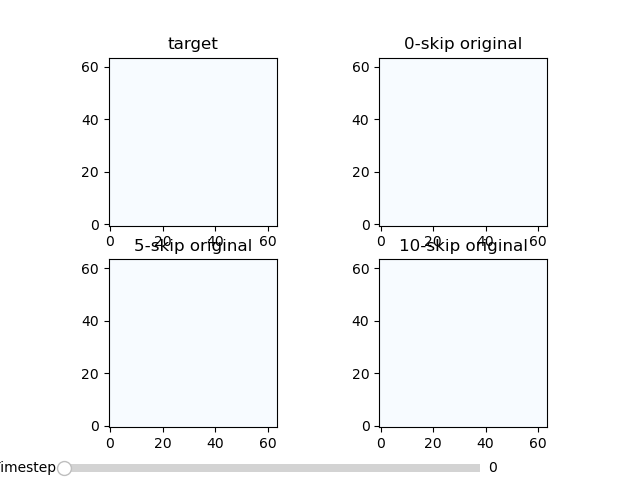

In [4]:
# Load in the models
save_path = "../results/trained_models/unet/"
unet1 = UNet(2, [32,64], 1)
unet1.load_state_dict(torch.load(save_path + "unet_32_64_orig_data80_skip0", map_location="cpu"))
unet1.eval()

unet2 = UNet(2, [32,64], 1)
unet2.load_state_dict(torch.load(save_path + "unet_32_64_orig_data80_skip5", map_location="cpu"))
unet2.eval()

unet3= UNet(2, [32,64], 1)
unet3.load_state_dict(torch.load(save_path + "unet_32_64_orig_data80_skip10", map_location="cpu"))
unet3.eval()

models = [unet1, unet2, unet3]

skips = [0, 5, 10]
labels = ["target", "0-skip original", "5-skip original", "10-skip original"]

sim = WaterTopo.load_simulations(str(root)+"/data/normalized_data/test1", 
                                 1, grid_size, 
                                 use_augmented_data=True)[0]

topo = sim.topography.reshape([1, grid_size, grid_size])
wd_0 = sim.wd[0].reshape([1, grid_size, grid_size])
X = np.concatenate([topo, wd_0])

wds = []
wds.append(sim.wd)

with torch.no_grad():
    shortest_wd = np.inf

    for i in range(len(models)):
        models[i].train(False)
        skip = skips[i]

        if skips:
            sim_skips = sim.implement_skips(skip)

        outputs = recursive_pred(models[i], X, sim_skips.wd.shape[0]-1, include_first_timestep=True)
        wds.append(outputs.detach().numpy())

    slider1 = compare_simulations_slider(wds, labels)

### With augmented data

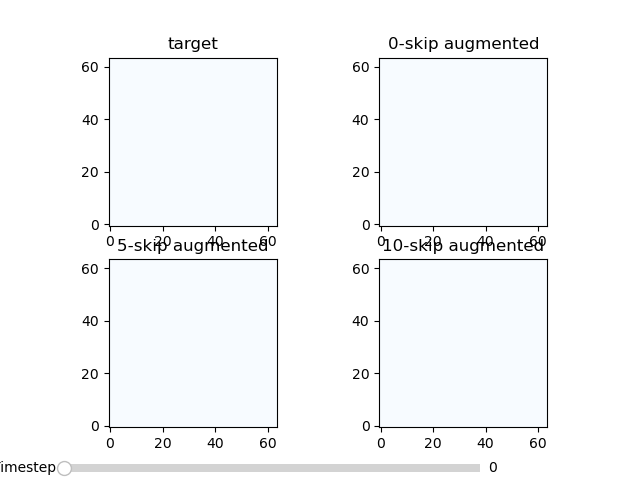

In [5]:
# Load in the models
save_path = "../results/trained_models/unet/"
unet1 = UNet(2, [32,64], 1)
unet1.load_state_dict(torch.load(save_path + "unet_32_64_aug_data400_skip0", map_location="cpu"))
unet1.eval()

unet2 = UNet(2, [32,64], 1)
unet2.load_state_dict(torch.load(save_path + "unet_32_64_aug_data80_skip5", map_location="cpu"))
unet2.eval()

unet3= UNet(2, [32,64], 1)
unet3.load_state_dict(torch.load(save_path + "unet_32_64_aug_data80_skip10", map_location="cpu"))
unet3.eval()

models = [unet1, unet2, unet3]

skips = [0, 5, 10]
labels = ["target", "0-skip augmented", "5-skip augmented", "10-skip augmented"]

sim = WaterTopo.load_simulations(str(root)+"/data/normalized_data/test2", 
                                 1, grid_size, 
                                 use_augmented_data=True)[0]

topo = sim.topography.reshape([1, grid_size, grid_size])
wd_0 = sim.wd[0].reshape([1, grid_size, grid_size])
X = np.concatenate([topo, wd_0])

wds = []
wds.append(sim.wd)

with torch.no_grad():
    shortest_wd = np.inf

    for i in range(len(models)):
        models[i].train(False)
        skip = skips[i]

        if skips:
            sim_skips = sim.implement_skips(skip)

        outputs = recursive_pred(models[i], X, sim_skips.wd.shape[0]-1, include_first_timestep=True)
        wds.append(outputs.detach().numpy())

    slider2 = compare_simulations_slider(wds, labels)

### Compare models with different step sizes with hidden channels [32, 64, 128]

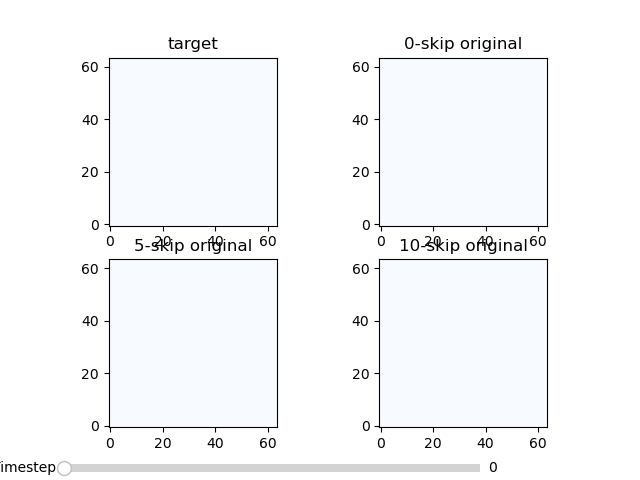

In [19]:
# Load in the models
save_path = "../results/trained_models/unet/"
unet1 = UNet(2, [32,64, 128], 1)
unet1.load_state_dict(torch.load(save_path + "unet_32_64_128_orig_data80_skip0", map_location="cpu"))
unet1.eval()

unet2 = UNet(2, [32,64,128], 1)
unet2.load_state_dict(torch.load(save_path + "unet_32_64_128_orig_data80_skip5", map_location="cpu"))
unet2.eval()

unet3= UNet(2, [32,64,128], 1)
unet3.load_state_dict(torch.load(save_path + "unet_32_64_128_orig_data80_skip10", map_location="cpu"))
unet3.eval()

models = [unet1, unet2, unet3]

skips = [0, 5, 10]
labels = ["target", "0-skip original", "5-skip original", "10-skip original"]

sim = WaterTopo.load_simulations(str(root)+"/data/normalized_data/test1", 
                                 1, grid_size, 
                                 use_augmented_data=True)[0]

topo = sim.topography.reshape([1, grid_size, grid_size])
wd_0 = sim.wd[0].reshape([1, grid_size, grid_size])
X = np.concatenate([topo, wd_0])

wds = []
wds.append(sim.wd)

with torch.no_grad():
    for i in range(len(models)):
        models[i].train(False)
        skip = skips[i]

        if skips:
            sim_skips = sim.implement_skips(skip)

        outputs = recursive_pred(models[i], X, sim_skips.wd.shape[0]-1, include_first_timestep=True)
        wds.append(outputs.detach().numpy())

    slider3 = compare_simulations_slider(wds, labels)

### Let's compare that to the the original source U-Net, with layers [64, ... , 1024]

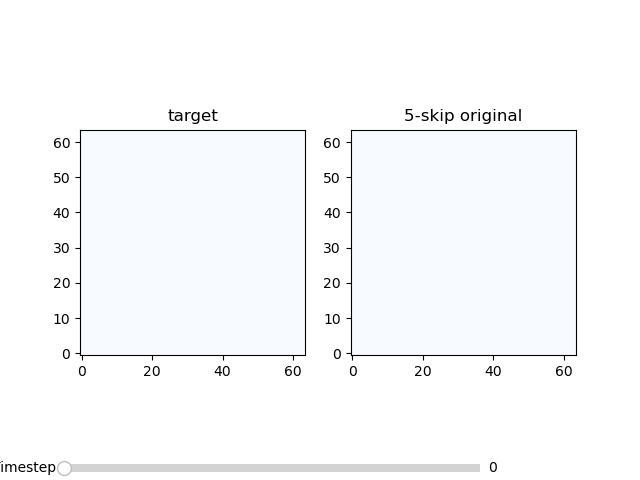

In [16]:
# Load in the models
save_path = "../results/trained_models/unet/"
unet1 = UNet_source(2, 1)
unet1.load_state_dict(torch.load(save_path + "unet_source_orig_skip5", map_location="cpu"))
unet1.eval()

models = [unet1]

skips = [5]
labels = ["target","5-skip original"]

sim = WaterTopo.load_simulations(str(root)+"/data/normalized_data/test1", 
                                 1, grid_size, 
                                 use_augmented_data=True)[0]

topo = sim.topography.reshape([1, grid_size, grid_size])
wd_0 = sim.wd[0].reshape([1, grid_size, grid_size])
X = np.concatenate([topo, wd_0])

wds = []
wds.append(sim.wd)

with torch.no_grad():
    for i in range(len(models)):
        models[i].train(False)
        skip = skips[i]

        if skips:
            sim_skips = sim.implement_skips(skip)

        outputs = recursive_pred(models[i], X, sim_skips.wd.shape[0]-1, include_first_timestep=True)
        wds.append(outputs.detach().numpy())

    slider4 = compare_simulations_slider(wds, labels)

### Now let's apply a mask

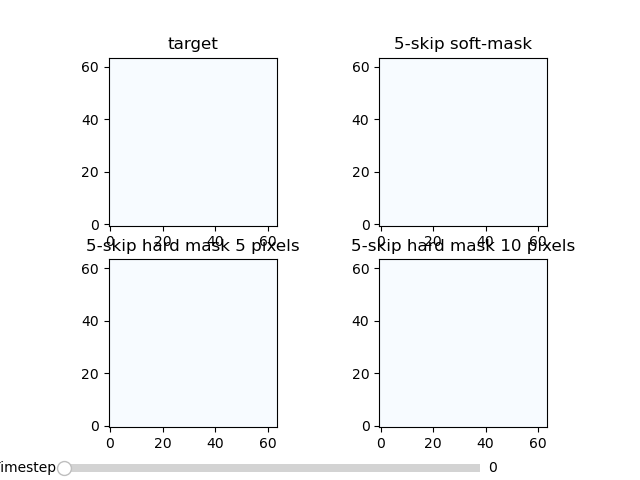

In [14]:
# Load in the models
save_path = "../results/trained_models/unet_mask/"
unet1 = UNet_mask(2, [32, 64], 1)
unet1.load_state_dict(torch.load(save_path + "unet_32_64_orig_data80_skip5_mask", map_location="cpu"))
unet1.eval()

unet2 = UNet_mask(2, [32, 64], 1, 10)
unet2.load_state_dict(torch.load(save_path + "unet_32_64_orig_data80_skip5_hardmask5", map_location="cpu"))
unet2.eval()

unet3 = UNet_mask(2, [32, 64], 1, 10)
unet3.load_state_dict(torch.load(save_path + "unet_32_64_orig_data80_skip5_hardmask10", map_location="cpu"))
unet3.eval()

models = [unet1, unet2, unet3]

skips = [5, 5, 5]
labels = ["target","5-skip soft-mask", "5-skip hard mask 5 pixels", "5-skip hard mask 10 pixels"]

sim = WaterTopo.load_simulations(str(root)+"/data/normalized_data/test1", 
                                 1, grid_size, 
                                 use_augmented_data=True)[0]

topo = sim.topography.reshape([1, grid_size, grid_size])
wd_0 = sim.wd[0].reshape([1, grid_size, grid_size])
X = np.concatenate([topo, wd_0])

wds = []
wds.append(sim.wd)

with torch.no_grad():
    for i in range(len(models)):
        models[i].train(False)
        skip = skips[i]

        if skips:
            sim_skips = sim.implement_skips(skip)

        outputs = recursive_pred(models[i], X, sim_skips.wd.shape[0]-1, include_first_timestep=True)
        wds.append(outputs.detach().numpy())
            
    slider5 = compare_simulations_slider(wds, labels)

### Multistep with different amounts of hidden channels.

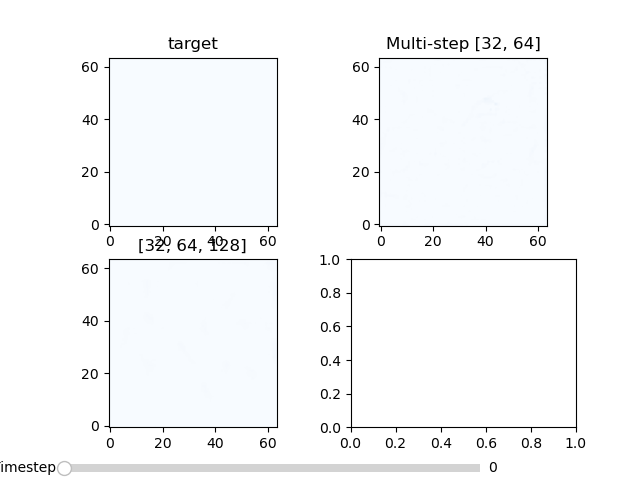

In [9]:
# Load in the models
save_path = "../results/trained_models/unet/"
unet1 = UNet(2, [32, 64], 96)
unet1.load_state_dict(torch.load(save_path + "unet_32_64_orig_data80_multistep_skip0", map_location="cpu"))
unet1.eval()

unet2 = UNet(2, [32, 64, 128], 96)
unet2.load_state_dict(torch.load(save_path + "unet_32_64_128_orig_data80_multistep_skip0", map_location="cpu"))
unet2.eval()

models = [unet1, unet2]

skips = [5, 5]
labels = ["target","Multi-step [32, 64]", "[32, 64, 128]"]
sim = WaterTopo.load_simulations(str(root)+"/data/normalized_data/test1", 
                                 1, grid_size, 
                                 use_augmented_data=True)[0]

topo = sim.topography.reshape([1, grid_size, grid_size])
wd_0 = sim.wd[0].reshape([1, grid_size, grid_size])
X = np.concatenate([topo, wd_0])

wds = []
wds.append(sim.wd)

with torch.no_grad():
    for i in range(len(models)):
        models[i].train(False)
        skip = skips[i]

        if skips:
            sim_skips = sim.implement_skips(skip)

        outputs = models[i](torch.tensor(X, dtype=torch.float32).unsqueeze(0))
        outputs = outputs.squeeze()
        wds.append(outputs.detach().numpy())
            
    slider6 = compare_simulations_slider(wds, labels)

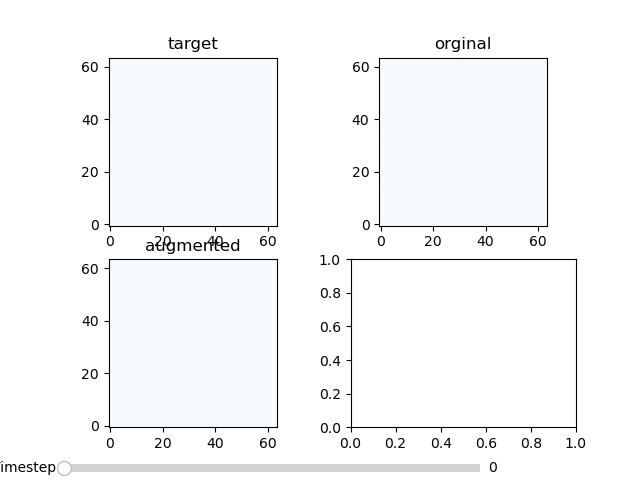

In [13]:
# Load in the models
save_path = "../results/trained_models/unet/"
unet1 = UNet_source(2, 96)
unet1.load_state_dict(torch.load(save_path + "unet_source_orig_data80_multistep_skip0", map_location="cpu"))
unet1.eval()

unet2 = UNet_source(2, 96)
unet2.load_state_dict(torch.load(save_path + "unet_source_aug_data80_multistep_skip0", map_location="cpu"))
unet2.eval()

models = [unet1, unet2]

skips = [0, 0]
labels = ["target", "orginal", "augmented"]
sim = WaterTopo.load_simulations(str(root)+"/data/normalized_data/tra_val", 
                                 1, grid_size, 
                                 use_augmented_data=True)[0]

topo = sim.topography.reshape([1, grid_size, grid_size])
wd_0 = sim.wd[0].reshape([1, grid_size, grid_size])
X = np.concatenate([topo, wd_0])

wds = []
wds.append(sim.wd)

with torch.no_grad():
    for i in range(len(models)):
        models[i].train(False)
        skip = skips[i]

        if skips:
            sim_skips = sim.implement_skips(skip)

        outputs = models[i](torch.tensor(X, dtype=torch.float32).unsqueeze(0))
        outputs = outputs.squeeze()
        wds.append(outputs.detach().numpy())
            
    slider7 = compare_simulations_slider(wds, labels)

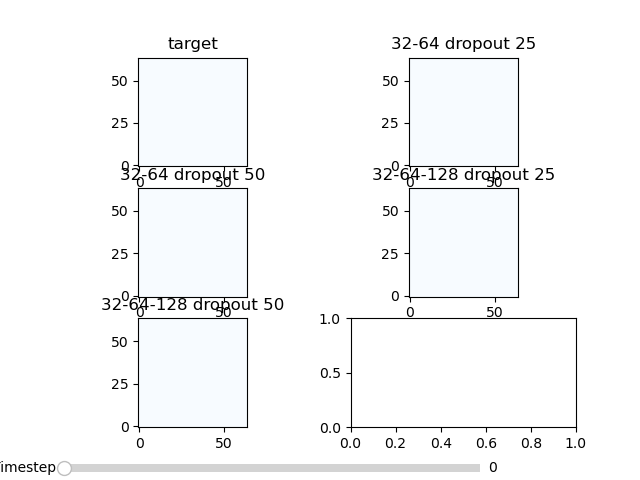

In [5]:
# Load in the models
save_path = "../results/trained_models/unet_dropout/"
unet1 = UNet_dropout(2, [32, 64], 1, 5, False, 0.25)
unet1.load_state_dict(torch.load(save_path + "unet_32_64_orig_data80_skip5_hardmask5_drop25", map_location="cpu"))
unet1.eval()

unet2 = UNet_dropout(2, [32, 64], 1, 5, False, 0.5)
unet2.load_state_dict(torch.load(save_path + "unet_32_64_orig_data80_skip5_hardmask5_drop50", map_location="cpu"))
unet2.eval()

unet3 = UNet_dropout(2, [32, 64, 128], 1, 5, False, 0.25)
unet3.load_state_dict(torch.load(save_path + "unet_32_64_128_orig_data80_skip5_hardmask5_drop25", map_location="cpu"))
unet3.eval()

unet4 = UNet_dropout(2, [32, 64, 128], 1, 5, False, 0.5)
unet4.load_state_dict(torch.load(save_path + "unet_32_64_128_orig_data80_skip5_hardmask5_drop50", map_location="cpu"))
unet4.eval()

models = [unet1, unet2, unet3, unet4]

skips = [5, 5, 5, 5]
labels = ["target","32-64 dropout 25", "32-64 dropout 50", "32-64-128 dropout 25", "32-64-128 dropout 50"]

sim = WaterTopo.load_simulations(str(root)+"/data/normalized_data/test1", 
                                 1, grid_size, 
                                 use_augmented_data=True)[0]

topo = sim.topography.reshape([1, grid_size, grid_size])
wd_0 = sim.wd[0].reshape([1, grid_size, grid_size])
X = np.concatenate([topo, wd_0])

wds = []
wds.append(sim.wd)

with torch.no_grad():
    for i in range(len(models)):
        models[i].train(False)
        skip = skips[i]

        if skips:
            sim_skips = sim.implement_skips(skip)

        outputs = recursive_pred(models[i], X, sim_skips.wd.shape[0]-1, include_first_timestep=True)
        wds.append(outputs.detach().numpy())
            
    slider5 = compare_simulations_slider(wds, labels)